**Analyse entre :**
* **Connectivités Attractives basées sur les sujets pour les modèles SL et DG ($CA$)**
* **Connectivités Structurelles ($CS$)**

**et**
* **Connectivités Fonctionnelles Spatiales Empiriques ($CFS_E$)**

---
# Librairies / Dossiers

In [1]:
%pylab inline
import DB; db = DB.database()
import Tools.ext as Te
import Tools.display as Td
import Tools.matrices as Tm
import Tools.functions as Tf
from scipy.stats import ranksums

Populating the interactive namespace from numpy and matplotlib
267.99 GB for 46318 items


# Chargement

In [2]:
CFSE = db.load(name='FC_M', project='Maxime')
CFSEBP = db.load(name='FC_BP', project='Maxime')
LF = db.load(name='LF', project='Maxime')

43.19 MB for 42 items
43.19 MB for 42 items
82.27 MB for 40 items


In [ ]:
CS = db.load(name='SC_', project='Maxime')
CSbin = dict(CS)
for k in CS.keys():
    CSbin[k] = where(CS[k] > 0.1, log(CS[k]), log(0.1))

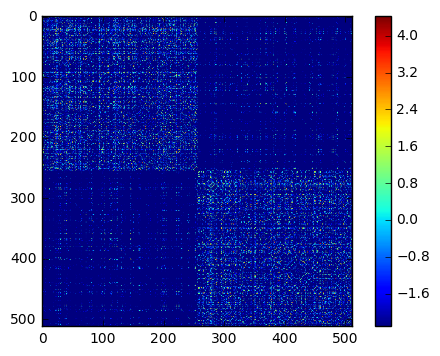

In [4]:
imshow(CSbin[k]); colorbar();

In [10]:
corrcoef(CSbin['SC_Max_512_p06'].flatten(), CSbin['SC_Max_512_p05'].flatten())[0,1]

0.83104487352433853

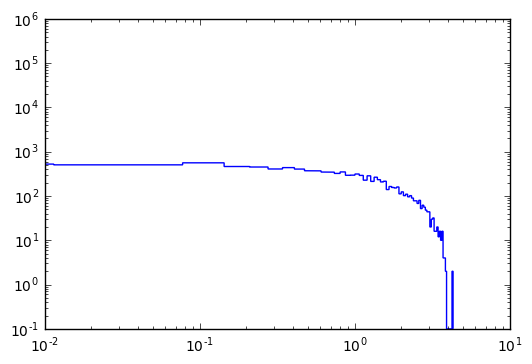

In [11]:
hist(CSbin['SC_Max_512_p06'].flatten(), 100, log=True, histtype='step'); xscale("log");

In [9]:
CA = db.load(name=['CA'], project='Maxime')

41.13 MB for 40 items


In [8]:
indU = Tm.triHemi(empty((512,512)), ind=True, h=1)
indL = Tm.triHemi(empty((86,86)), ind=True, h=1)

In [7]:
KS = sorted([k[:3] for k in Te.os.listdir("/home/golos/Main/TimeCourses/Jonathan/512/grey_matter_sansSB_sansLCR")])
KS3 = list(KS); KS3.remove('t03')

# Corrélations

In [3]:
from Tools.stats import distance_Euclidean

In [4]:
code = """
%s_%s = empty((len(%s), len(%s)))
for i1, k1 in enumerate(%s):
    for i2, k2 in enumerate(%s):
        %s_%s[i1, i2] = corrcoef(%s['%s'+k1].take(indU), %s['%s'+k2].take(indU))[0,1]
"""

In [5]:
objs = ['CFSE','CFSEBP','CS','CSbin','CA','LF']
keys = ['KS','KS','KS3','KS3','KS3','KS3']
item = ['FC_Max_512_','FC_BP_Max_512_','SC_Max_512_','SC_Max_512_','CA_SL_N512_','LF_Max_512_']

In [11]:
corrs = {}
for obj1, key1, ite1 in zip(objs, keys, item):
    for obj2, key2, ite2 in zip(objs, keys, item):
        exec code %(obj1,obj2,  key1,key2,  key1,key2,  obj1,obj2,  obj1,ite1,  obj2,ite2)
        corrs[obj1+' '+obj2] = eval(obj1+'_'+obj2)

# Renormalisation
* Pas de corrections pour les intra-objets
* Renormalisation pour les inter-objets

In [12]:
for k in corrs.keys():
    if len(set(k.split(' '))) == 2:
        corrs[k] = corrs[k] - corrs[k].mean(0)
        corrs[k] -= corrs[k].mean(1)[:,newaxis]
        corrs[k] /= corrs[k].max()

# Sub-Corr

In [13]:
sub3 = range(21); sub3.remove(7)

In [14]:
Individuel = {}
for k in corrs.keys():
    if len(set(k.split(' '))) == 2:
        if corrs[k].shape in [(21,21), (20,20)]:
            Individuel[k] = diag(corrs[k])
        elif corrs[k].shape[0] == 20:
            Individuel[k] = diag(corrs[k][:,sub3])
        elif corrs[k].shape[1] == 20:
            Individuel[k] = diag(corrs[k][sub3,:])
    else:
        Individuel[k] = diag(corrs[k])

In [15]:
Inter_Pop = {}
for k in corrs.keys():
    Inter_Pop[k] = r_[corrs[k][7:,:7].flatten(), 
                      corrs[k][:7,7:].flatten()]

In [16]:
Intra_Pat = {}
for k in corrs.keys():
    Intra_Pat[k] = r_[Tm.triSup(corrs[k][:7,:7]).flatten(), 
                      Tm.triInf(corrs[k][:7,:7]).flatten()]

In [17]:
Intra_Cont = {}
for k in corrs.keys():
    if corrs[k].shape in [(21,21), (20,20)]:
        Intra_Cont[k] = r_[Tm.triSup(corrs[k][7:,7:]).flatten(), 
                           Tm.triInf(corrs[k][7:,7:]).flatten()]
    elif corrs[k].shape[0] == 20:
        Intra_Cont[k] = r_[corrs[k][7:,7], 
                           Tm.triSup(corrs[k][7:,8:]).flatten(), 
                           Tm.triInf(corrs[k][7:,8:]).flatten()]
    elif corrs[k].shape[1] == 20:
        Intra_Cont[k] = r_[corrs[k][7,7:], 
                           Tm.triSup(corrs[k][8:,7:]).flatten(), 
                           Tm.triInf(corrs[k][8:,7:]).flatten()]

In [18]:
Confrontation = {}
for k in corrs.keys():
    Confrontation[k] = r_[Inter_Pop[k], Intra_Pat[k], Intra_Cont[k]]

## Test

In [56]:
for k in sorted(corrs.keys()):
    # Nombre d'éléments OK
    print k, (corrs[k]!=inf).sum() ==  (r_[Individuel[k], Inter_Pop[k], Intra_Pat[k], Intra_Cont[k]] != inf).sum()

CA CA True
CA CFSE True
CA CFSEBP True
CA CS True
CA CSbin True
CA LF True
CFSE CA True
CFSE CFSE True
CFSE CFSEBP True
CFSE CS True
CFSE CSbin True
CFSE LF True
CFSEBP CA True
CFSEBP CFSE True
CFSEBP CFSEBP True
CFSEBP CS True
CFSEBP CSbin True
CFSEBP LF True
CS CA True
CS CFSE True
CS CFSEBP True
CS CS True
CS CSbin True
CS LF True
CSbin CA True
CSbin CFSE True
CSbin CFSEBP True
CSbin CS True
CSbin CSbin True
CSbin LF True
LF CA True
LF CFSE True
LF CFSEBP True
LF CS True
LF CSbin True
LF LF True


# Visualisation

* CA et CFSE\* : plus grande variabilité inter-individuelle chez les patients que chez les contrôles
* Cette variabilité est absente chez le connectome seul

In [74]:
ranksums(Individuel['CA CS'], Confrontation['CA CS'])

RanksumsResult(statistic=7.5404148003671532, pvalue=4.6847889638306504e-14)

In [75]:
ranksums(Individuel['CFSE CS'], Confrontation['CFSE CS'])

RanksumsResult(statistic=1.9442038836224551, pvalue=0.051870869656118278)

In [76]:
ranksums(Intra_Cont['CFSE CFSE'], Intra_Pat['CFSE CFSE'])

RanksumsResult(statistic=5.996044978244143, pvalue=2.0218104387031119e-09)

In [77]:
ranksums(Intra_Cont['CA CA'], Intra_Pat['CA CA'])

RanksumsResult(statistic=3.1429458301367235, pvalue=0.0016725678972812758)

In [78]:
ranksums(Intra_Cont['CSbin CSbin'], Intra_Pat['CSbin CSbin'])

RanksumsResult(statistic=0.91011944888129048, pvalue=0.36275951872404233)

In [79]:
ranksums(Individuel['CA CS'], Confrontation['CA CS'])

RanksumsResult(statistic=7.5404148003671532, pvalue=4.6847889638306504e-14)

In [80]:
ranksums(Individuel['CFSE CS'], Confrontation['CFSE CS'])

RanksumsResult(statistic=1.9442038836224551, pvalue=0.051870869656118278)

In [81]:
ranksums(Intra_Cont['CA CA'], Intra_Pat['CA CA'])

RanksumsResult(statistic=3.1429458301367235, pvalue=0.0016725678972812758)

In [82]:
ranksums(Intra_Cont['CSbin CSbin'], Intra_Pat['CSbin CSbin'])

RanksumsResult(statistic=0.91011944888129048, pvalue=0.36275951872404233)

In [83]:
ranksums(Intra_Cont['LF LF'], Intra_Pat['LF LF'])

RanksumsResult(statistic=4.2108193168241046, pvalue=2.5444619516939419e-05)

In [128]:
k = 'CS CS'
print ranksums(Intra_Cont[k], Intra_Pat[k])[1], \
ranksums(Intra_Cont[k], Inter_Pop[k])[1], \
ranksums(Inter_Pop[k], Intra_Pat[k])[1]

0.331650831774 1.73415155555e-05 0.0840788208956


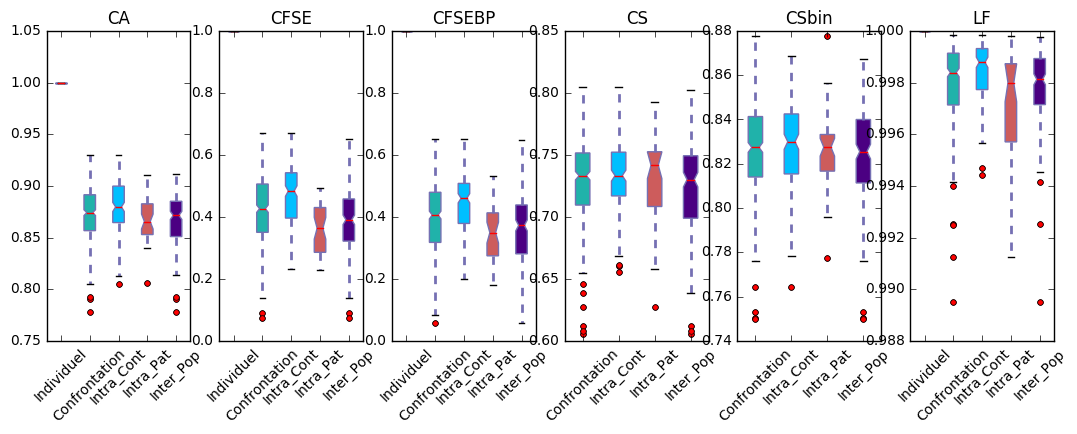

In [160]:
fig = figure(figsize=(13,4)); i=1
for k in sorted(corrs.keys()):
    if len(set(k.split(' '))) == 1:
        ax = fig.add_subplot(1,6,i); i+=1
        title(k.split(' ')[0])
        vals, pos, colors, labels = [], [], [], []
        if 'CS' not in k.split(' ')[0]:
            vals.append(Individuel[k]);    pos.append(0); colors.append('coral');         labels.append(r'Individuel')
        vals.append(Confrontation[k]); pos.append(1); colors.append('lightseagreen');          labels.append(r'Confrontation')
        vals.append(Intra_Cont[k]);    pos.append(2); colors.append('deepskyblue'); labels.append(r'Intra_Cont')
        vals.append(Intra_Pat[k]);     pos.append(3); colors.append('indianred'); labels.append(r'Intra_Pat')
        vals.append(Inter_Pop[k]);     pos.append(4); colors.append('indigo'); labels.append(r'Inter_Pop')
        flierprops = dict(marker='o', markerfacecolor='r', markersize=4, linestyle='none')
        boxes = ax.boxplot(vals, positions=pos, vert=1, labels=labels, notch=True, patch_artist=True, flierprops=flierprops, widths=0.4)
        #ylim(0,1.05)
        xticks(rotation=45)
        for whisker in boxes['whiskers']:
            whisker.set(color='#7570b3', linewidth=2)
        for box, color in zip(boxes['boxes'], colors):
            box.set( color='#7570b3', linewidth=1)
            box.set_facecolor(color)

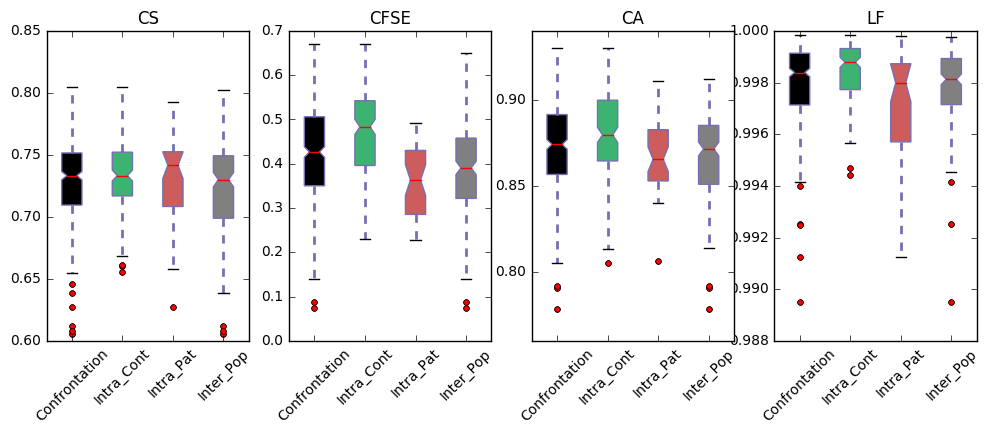

In [77]:
fig = figure(figsize=(12,4)); i=1
for K in ['CS','CFSE','CA','LF']:
    k = '%s %s'%(K,K)
    ax = fig.add_subplot(1,4,i); i+=1
    title(K)
    vals, pos, colors, labels = [], [], [], []
    vals.append(Confrontation[k]); pos.append(1); colors.append('black');          labels.append(r'Confrontation')
    vals.append(Intra_Cont[k]);    pos.append(2); colors.append('mediumseagreen'); labels.append(r'Intra_Cont')
    vals.append(Intra_Pat[k]);     pos.append(3); colors.append('indianred'); labels.append(r'Intra_Pat')
    vals.append(Inter_Pop[k]);     pos.append(4); colors.append('grey'); labels.append(r'Inter_Pop')
    flierprops = dict(marker='o', markerfacecolor='r', markersize=4, linestyle='none')
    boxes = ax.boxplot(vals, positions=pos, vert=1, labels=labels, notch=True, patch_artist=True, flierprops=flierprops, widths=0.4)
    #ylim(0,1.05)
    ax.set_zorder(-i)
    xticks(rotation=45)
    for whisker in boxes['whiskers']:
        whisker.set(color='#7570b3', linewidth=2)
    for box, color in zip(boxes['boxes'], colors):
        box.set( color='#7570b3', linewidth=1)
        box.set_facecolor(color)

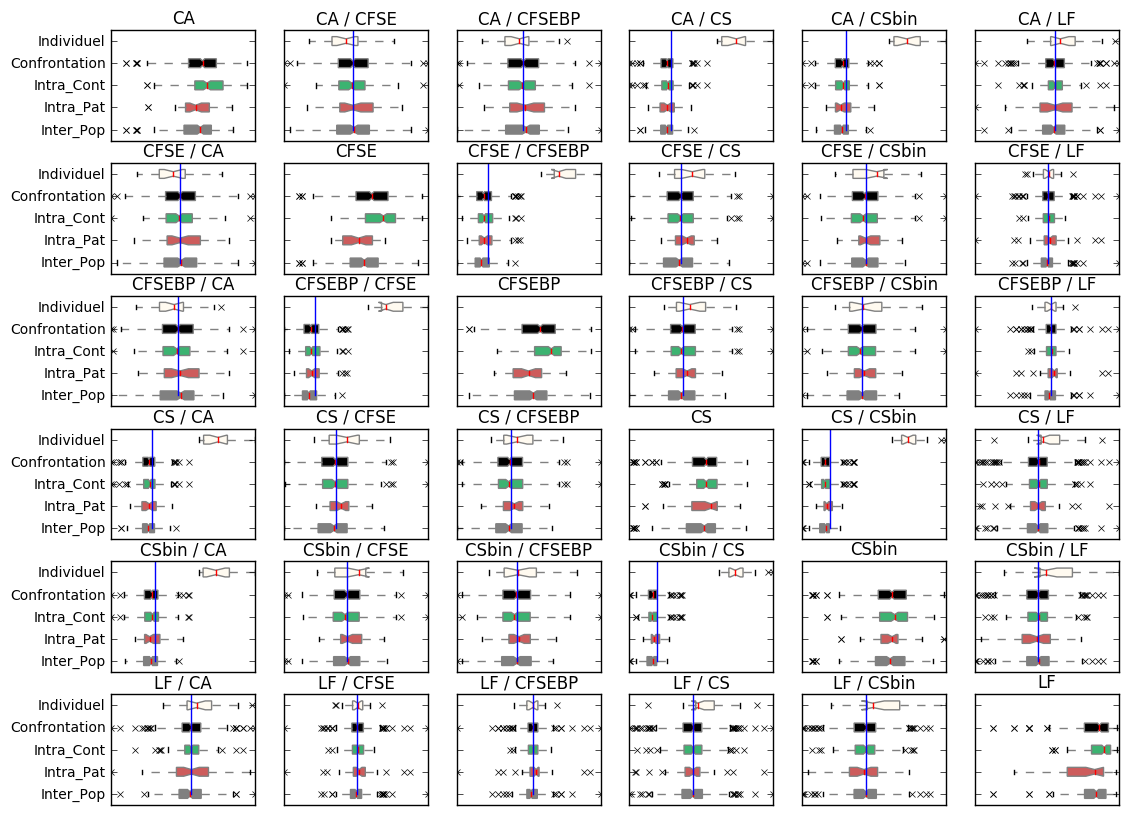

In [163]:
fig = figure(figsize=(13,10)); i=1
for k in sorted(corrs.keys()):
    ax = fig.add_subplot(6,6,i); i+=1
    if len(set(k.split(' '))) == 1:
        title(k.split(' ')[0])
    else:
        title(' / '.join(k.split(' ')))
    vals, pos, colors, labels = [], [], [], []
    for imat, mat, colo in zip(arange(5)[::-1], 
                               ['Individuel','Confrontation','Intra_Cont','Intra_Pat','Inter_Pop'], 
                               ['floralwhite','black','mediumseagreen','indianred','grey']):
        vals.append(eval(mat)[k]); pos.append(imat); colors.append(colo);
        if not (i-2)%6: labels.append(mat)
        else:           labels.append('')
    if len(set(k.split(' '))) == 1: vals[0] = []
            
    flierprops = dict(marker='x', markerfacecolor='grey', markersize=4, linestyle='none')
    boxes = ax.boxplot(vals, positions=pos, vert=0, labels=labels, notch=True, patch_artist=True, flierprops=flierprops, widths=0.4)
    #ylim(0,1.05); xticks(rotation=45) #if i<32: xticks([])
    #else:    #xlim(0,1.1)#xticks([])
    xticks([])

    for whisker in boxes['whiskers']:
        whisker.set(color='grey', linewidth=1)
    for box, color in zip(boxes['boxes'], colors):
        box.set( color='grey', linewidth=1)
        box.set_facecolor(color)
    
    if i not in [2,9,16,23,30,37]: plot([0,0],[0,5])

## Attracteurs

In [323]:
Attr = db.load(name=['Attr','512'], project='Maxime')

83.89 MB for 20 items


In [346]:
nba_p, nba_c = [], []
for k in sorted(Attr.keys()):
    if 'p' in k:
        nba_p.append( Attr[k].shape[0] )
    else:
        nba_c.append( Attr[k].shape[0] )

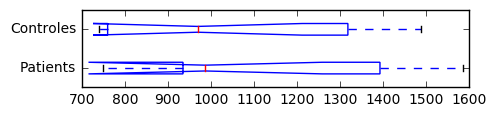

In [363]:
figure(figsize=(5,1))
boxplot([nba_p, nba_c], vert=0, labels=['Patients','Controles'], notch=True, patch_artist=True, flierprops=flierprops, widths=0.3);

In [378]:
dist = []
for k in sorted(Attr.keys()):
    xs = []
    for x in Attr[k]:
        xs.append( where(x < mean(x), 0., 1.).mean() )
    dist.append( xs )

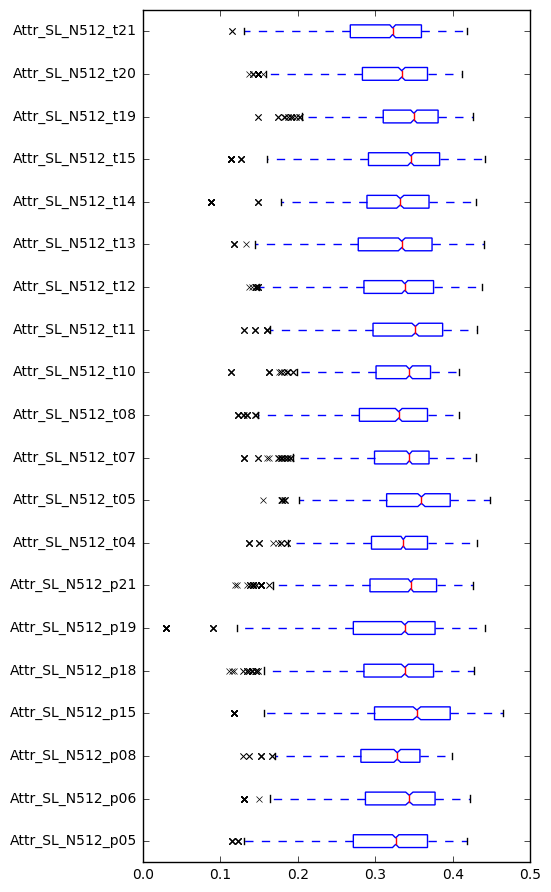

In [379]:
figure(figsize=(5,11))
boxplot(dist, vert=0, labels=sorted(Attr.keys()), notch=True, patch_artist=True, flierprops=flierprops, widths=0.3);

In [380]:
nba_p, nba_c = [], []
for k in sorted(Attr.keys()):
    xs = []
    for x in Attr[k]:
        xs.append( where(x < mean(x), 0., 1.).mean() )
    if 'p' in k:
        nba_p.extend( xs )
    else:
        nba_c.extend( xs )

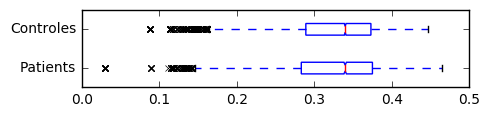

In [381]:
figure(figsize=(5,1))
boxplot([nba_p, nba_c], vert=0, labels=['Patients','Controles'], notch=True, patch_artist=True, flierprops=flierprops, widths=0.3);

# Distance

In [64]:
F1, F2 = CFSEBP['FC_BP_Max_512_t05'], CFSEBP['FC_BP_Max_512_t11']

In [121]:
f(F1,F2),f(F2,F1)

(240.86999785169039, 227.15066163339822)

In [109]:
f = lambda F1,F2: sqrt(sum(log(real(eig(inv(F2).dot(F1))[0]))**2))

In [120]:
f = lambda F1,F2: sqrt(sum(log(abs(eig(inv(F2).dot(F1))[0][isreal(eig(inv(F2).dot(F1))[0])]))**2))

In [106]:
D = zeros((len(KS), len(KS)))
for i1, s1 in zip(range(len(KS)), KS):
    for i2, s2 in zip(range(len(KS)), KS):
        D[i1, i2] = f(CFSEBP['FC_BP_Max_512_'+s1], CFSEBP['FC_BP_Max_512_'+s2])
        #D[i1, i2] = f(CA['CA_SL_N512_'+s1], CA['CA_SL_N512_'+s2])
        #D[i1, i2] = f(CS['SC_Max_512_'+s1], CS['SC_Max_512_'+s2])

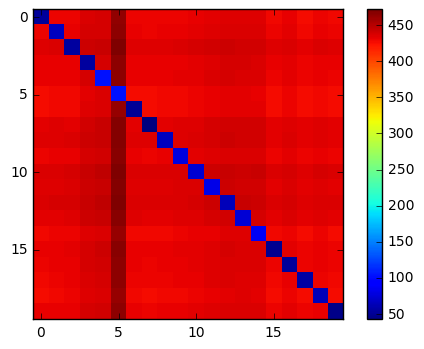

In [107]:
imshow(D, interpolation='nearest'); colorbar();